In [1]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import scipy.optimize as sco
import scipy.stats as sct

In [2]:
names1 = ['apo', 'bound', 'allo-apo', 'allo-bound', 'allo-both']

In [3]:
bins = np.arange(2,4,0.01)
xb = bins[1:] - (bins[1]-bins[0])/2
zeros = np.zeros(xb.shape)

In [4]:
wt = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_4jx1_{n}.xvg',
                comments=['@','#'])[:,1] 
     for n in names1]

In [5]:
hwt = [np.histogram(d, bins=bins, density=True)[0] for d in wt]

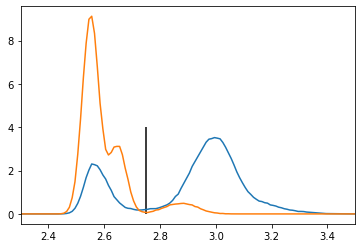

In [6]:
for h in [hwt[0],hwt[-1]]: plt.plot(xb, h)
plt.xlim(2.3,3.5)
plt.vlines(2.75, 0, 4, color='black')

In [13]:
[np.where(d<2.75)[0].shape[0]/d.shape[0] for d in wt]

[0.25466023251162817,
 0.36704939974666795,
 0.7878335715519814,
 0.5087310394712845,
 0.9284424818816743]

In [6]:
def normal(x, m, s):
    return 1/(np.sqrt(2*np.pi)*s) * np.exp(-0.5 * np.square((x-m)/s))
def binormal(x, m1, s1, m2, s2, p):
    return p*normal(x,m1,s1) + (1-p)*normal(x,m2,s2)

In [7]:
params = sco.curve_fit(binormal, xb, hwt[0],
             bounds=(
                 [2.2, 0, 2.7, 0, 0],
                 [2.7, 2, 3.2, 2, 1]
             )
             )[0]

array([2.57284986, 0.04476157, 2.99321723, 0.08471644, 0.25884633])

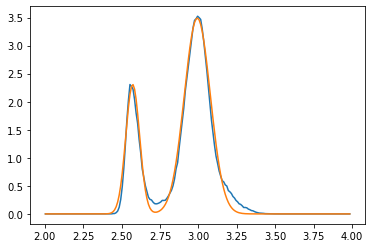

In [8]:
plt.plot(xb, hwt[0])
plt.plot(xb, binormal(xb, *params) )
params

In [8]:
names2 = ['g2489a', 'g249v', 'g249w', 'og249w']

In [9]:
closed = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_{n}_apo.xvg',
                    comments=['@','#'])[:,1]
         for n in names2]

In [10]:
hclosed = [np.histogram(d, bins=bins, density=True)[0] for d in closed]

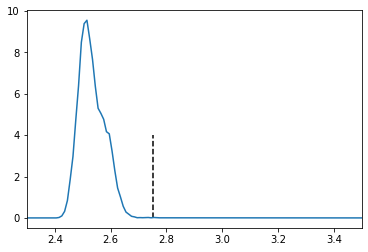

In [14]:
for h in [hclosed[-2]]: plt.plot(xb, h)
plt.xlim(2.3,3.5)
plt.vlines(2.75,0,4, linestyle='--', color='black')

In [15]:
[np.where(d<2.75)[0].shape[0]/d.shape[0] for d in closed]

[0.6666683760596099, 0.6391979898466745, 0.999589764627455, 0.8057022716783755]

In [11]:
opened = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_l166a_{n}.xvg',
                    comments=['@','#'])[:,1]
         for n in names1[:2]]

In [12]:
hopened = [np.histogram(d, bins=bins, density=True)[0] for d in opened]

(2.3, 3.5)

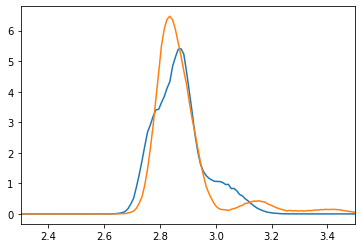

In [19]:
for h in hopened: plt.plot(xb,h)
plt.xlim(2.3,3.5)

In [20]:
[np.where(d<2.75)[0].shape[0]/d.shape[0] for d in opened]

[0.07260988405187666, 0.022246039763898648]

In [13]:
decoupled = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_f163a_{n}.xvg',
                    comments=['@','#'])[:,1]
            for n in names1]

In [14]:
hdecoupled = [np.histogram(d, bins=bins, density=True)[0] for d in decoupled]

(2.3, 3.5)

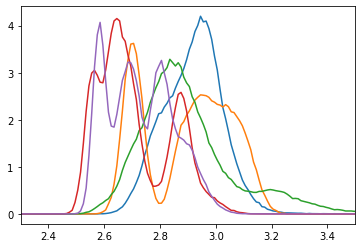

In [6]:
for h in hdecoupled: plt.plot(xb,h)
plt.xlim(2.3,3.5)

In [7]:
[np.where(d<2.75)[0].shape[0]/d.shape[0] for d in decoupled]

[0.05705098948210522,
 0.3014292234398798,
 0.17005899984054096,
 0.6905452378190488,
 0.5672997460386942]

In [44]:
decoupled2 = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_multi_{n}.xvg',
                    comments=['@','#'])[:,1]
            for n in names1]

In [45]:
hdecoupled2 = [np.histogram(d, bins=bins, density=True)[0] for d in decoupled2]

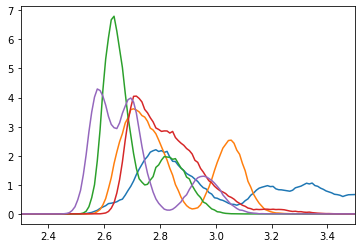

In [30]:
for h in hdecoupled2[:5]: plt.plot(xb,h)
plt.xlim(2.3,3.5)
plt.show()

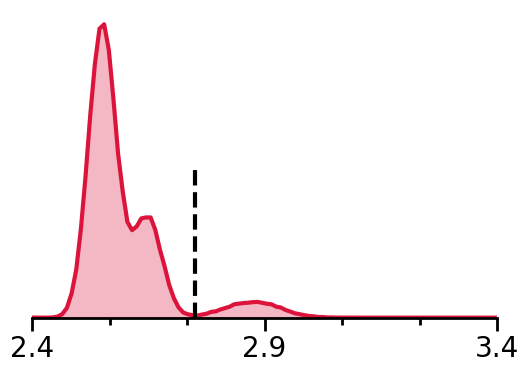

In [31]:
curve = hwt[4]
oname='ith_wt_3s'
fig,ax=plt.subplots(1, figsize=(6,4))
ax.fill_between(xb, zeros, curve, color='crimson', alpha=0.3)
ax.plot(xb, curve, color='crimson', lw=3)
ax.set_xlim(2.4,3.4)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(0,)
ax.vlines(2.75, 0, ax.get_ylim()[1]/2, linestyle='--', lw=3, color='black')
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(labelleft=False, left=False, labelsize=20, length=9, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

In [14]:
names2

['g2489a', 'g249v', 'g249w', 'og249w']

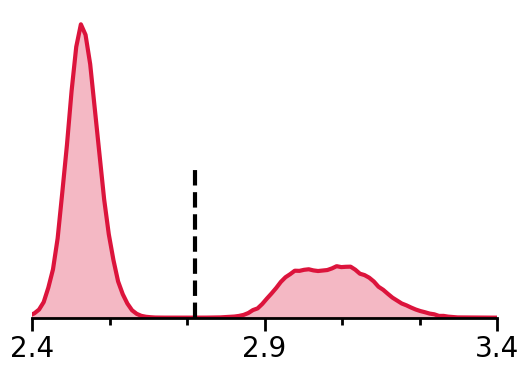

In [35]:
curve = hclosed[0]
oname='ith_g2489a_sf'
fig,ax=plt.subplots(1, figsize=(6,4))
#
ax.fill_between(xb, zeros, curve, color='crimson', alpha=0.3)
ax.plot(xb, curve, color='crimson', lw=3)
#
# curve = hclosed[2]
# ax.fill_between(xb, zeros, curve, color='dodgerblue', alpha=0.3)
# ax.plot(xb, curve, color='dodgerblue', lw=3)
#
ax.set_xlim(2.4,3.4)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(0,)
ax.vlines(2.75, 0, ax.get_ylim()[1]/2, linestyle='--', lw=3, color='black')
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(labelleft=False, left=False, labelsize=20, length=9, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

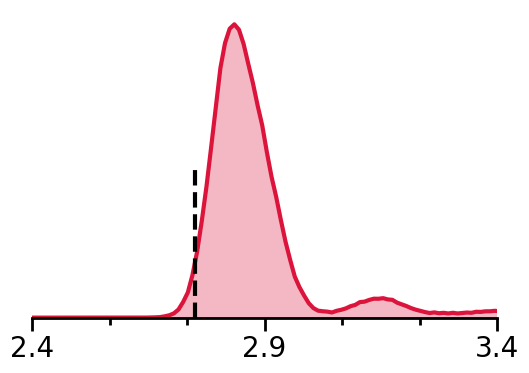

In [53]:
curve = hopened[1]
oname='ith_l166a_cata'
fig,ax=plt.subplots(1, figsize=(6,4))
ax.fill_between(xb, zeros, curve, color='crimson', alpha=0.3)
ax.plot(xb, curve, color='crimson', lw=3)
ax.set_xlim(2.4,3.4)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(0,)
ax.vlines(2.75, 0, ax.get_ylim()[1]/2, linestyle='--', lw=3, color='black')
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(labelleft=False, left=False, labelsize=20, length=9, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

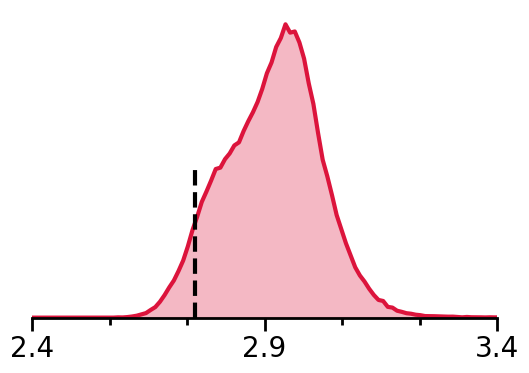

In [42]:
curve = hdecoupled[0]
oname='ith_f163a_sf'
fig,ax=plt.subplots(1, figsize=(6,4))
ax.fill_between(xb, zeros, curve, color='crimson', alpha=0.3)
ax.plot(xb, curve, color='crimson', lw=3)
ax.set_xlim(2.4,3.4)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(0,)
ax.vlines(2.75, 0, ax.get_ylim()[1]/2, linestyle='--', lw=3, color='black')
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(labelleft=False, left=False, labelsize=20, length=9, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

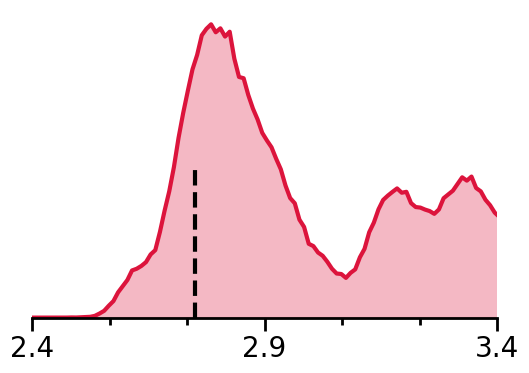

In [58]:
curve = hdecoupled2[0]
oname='ith_multi_sf'
fig,ax=plt.subplots(1, figsize=(6,4))
ax.fill_between(xb, zeros, curve, color='crimson', alpha=0.3)
ax.plot(xb, curve, color='crimson', lw=3)
ax.set_xlim(2.4,3.4)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(0,)
ax.vlines(2.75, 0, ax.get_ylim()[1]/2, linestyle='--', lw=3, color='black')
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(labelleft=False, left=False, labelsize=20, length=9, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()